## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

# path='/content/drive/MyDrive/Mask_Dataset/'
path='/content/drive/MyDrive/ABHAY SISODIA/Mask_Dataset/'
data_dir = pathlib.Path(path)

In [4]:
data_dir

PosixPath('/content/drive/MyDrive/ABHAY SISODIA/Mask_Dataset')

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [5]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


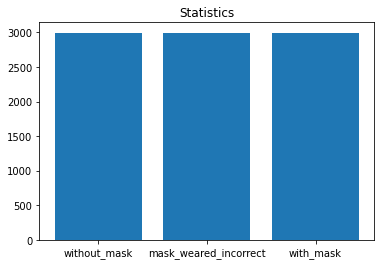

In [8]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

In [9]:
import cv2
path_new=path+output_classes[2]+'/15.png'
img = cv2.imread (path_new,1) 


In [10]:
path_new

'/content/drive/MyDrive/ABHAY SISODIA/Mask_Dataset/with_mask/15.png'

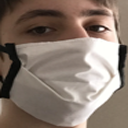

In [11]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(img)
# Your code

In [12]:
x=img.shape
x
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model

(128, 128, 3)

In [13]:
import random
for label in output_classes:
  print(label)
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  rand_no=random.randint(0,2994)
  print(rand_no)
  image = this_path+'/'+im_count[rand_no] #Checking the shape of 3 random images from the 3 different classes and we find all the images have the same shape (128,128,3)
  testing=cv2.imread(image)
  print(testing.shape)
  
  


without_mask
2616
(128, 128, 3)
mask_weared_incorrect
915
(128, 128, 3)
with_mask
919
(128, 128, 3)


In [14]:
flag=False
 # for comparison we contain a touple

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(len(im_count)):
    image = this_path+'/'+im_count[i] 
    testing=cv2.imread(image)
    if testing.shape!=img.shape:
      flag=True

if(flag):
  print("Different sized images are present")

In [ ]:


# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [16]:
# Choose and define base model
IMAGE_SIZE = [128, 128]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
vgg16.summary()
# Print base model summary and have a look at the layers

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [18]:

# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)

for layer in vgg16.layers:
    layer.trainable = False


In [19]:
output_classes

['without_mask', 'mask_weared_incorrect', 'with_mask']

In [27]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model


inputs = tf.keras.Input(shape=IMAGE_SIZE + [3])
x = inputs
x = vgg16(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dense(256)(x)
outputs = tf.keras.layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)


In [29]:
# Add the final output layer
prediction = Dense(len(output_classes), activation='softmax')(x)


In [30]:
# Print your model's summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,878,659
Trainable params: 2,163,971
Non-trai

In [31]:
# Compile you model (set the parameters like loss/optimizers/metrics)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [32]:
from keras_preprocessing.image import ImageDataGenerator

label_datagen = ImageDataGenerator( rescale = 1./255, validation_split=0.2)

# Your code 

In [33]:
from keras.backend import categorical_crossentropy
# Your code
train_label_generator = label_datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="training",
    class_mode='categorical',
    batch_size=32)
validation_label_generator = label_datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="validation",
    class_mode='categorical',
    batch_size=32)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [34]:
# Your code





### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [39]:
from keras.callbacks import ModelCheckpoint

hist = model.fit(train_label_generator, validation_data=validation_label_generator, epochs=50, batch_size=50)

# ModelCheckpoint is helpful to save the model giving best results (brownie points)

Epoch 1/50
225/225 [==============================] - 24s 105ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.1409 - val_accuracy: 0.9693
Epoch 2/50
225/225 [==============================] - 23s 100ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.1305 - val_accuracy: 0.9727
Epoch 3/50
225/225 [==============================] - 23s 103ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1150 - val_accuracy: 0.9822
Epoch 4/50
225/225 [==============================] - 23s 102ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1538 - val_accuracy: 0.9788
Epoch 5/50
225/225 [==============================] - 25s 112ms/step - loss: 6.2750e-04 - accuracy: 0.9999 - val_loss: 0.1324 - val_accuracy: 0.9822
Epoch 6/50
225/225 [==============================] - 24s 106ms/step - loss: 5.7412e-04 - accuracy: 0.9999 - val_loss: 0.2892 - val_accuracy: 0.9638
Epoch 7/50
225/225 [==============================] - 23s 102ms/step - loss: 0.1654 - accuracy: 0.9734 - val_loss: 0.1862 

### Evaluate the performance

In [40]:
# Plot training & validation loss/accuracy values

import pandas as pd
res_2=pd.DataFrame(hist.history)
res_2['epoch']=hist.epoch
res_2.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.016776,0.995131,0.140860,0.969342,0
1,0.002999,0.998887,0.130457,0.972687,1
2,0.001879,0.999304,0.115042,0.982163,2
3,0.001461,0.999583,0.153825,0.978818,3
4,0.000627,0.999861,0.132381,0.982163,4


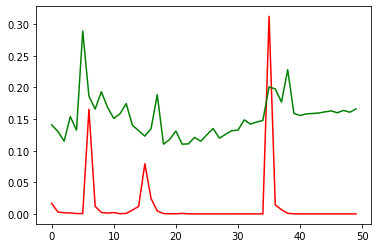

In [41]:
import matplotlib.pyplot as plt
plt.plot(res_2["epoch"],res_2["loss"],'red')
plt.plot(res_2["epoch"],res_2["val_loss"],'green')

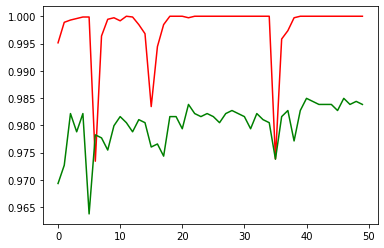

In [43]:
plt.plot(res_2["epoch"],res_2["accuracy"],'red')
plt.plot(res_2["epoch"],res_2["val_accuracy"],'green')

In [42]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

validation_classes = []
validation_images = []
for i in range( -(-validation_label_generator.samples // validation_label_generator.batch_size)):
   batch = validation_label_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred, 
		target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']))
# print classification report

                       precision    recall  f1-score   support

mask_weared_incorrect       0.99      1.00      0.99       598
            with_mask       0.98      0.97      0.98       598
         without_mask       0.98      0.98      0.98       598

             accuracy                           0.98      1794
            macro avg       0.98      0.98      0.98      1794
         weighted avg       0.98      0.98      0.98      1794



In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)